In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
plt.style.use('default')

In [2]:
adv = pd.read_csv("D:\\PROGRAMMING\\Datasets\\advertising.csv")
adv

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


> Dependent Independent variable separation

In [3]:
X = adv[['TV', 'Radio', 'Newspaper']]
y = adv['Sales']

> Significance level checking

In [4]:
# The inclusion of a constant allows the regression line to have an intercept point with 
# the y-axis, even when all independent variables are zero.

In [5]:
## adding constant to independent variables
X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        22:52:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [6]:
#Here the newspaper should be excluded as it is insignificant and we are accepting the null hyp

X = X.drop(['Newspaper'], axis = 1)
X

,const,TV,Radio
0,1.0,230.1,37.8
1,1.0,44.5,39.3
2,1.0,17.2,45.9
3,1.0,151.5,41.3
4,1.0,180.8,10.8
...,...,...,...
195,1.0,38.2,3.7
196,1.0,94.2,4.9
197,1.0,177.0,9.3
198,1.0,283.6,42.0


> Find coefficients | p_value | confidence interval

In [7]:
print("The coefficients are : ")
est.params

The coefficients are : 


const        2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [8]:
print("The p_values are : ")
est.pvalues

The p_values are : 


const        1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [9]:
print("The confidence intervals are : ")
est.conf_int()

The confidence intervals are : 


,0,1
const,2.323762,3.554016
TV,0.043014,0.048516
Radio,0.171547,0.205513
Newspaper,-0.012616,0.010541


> Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


> Training our model

In [11]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

> Predicting the best fit line

In [12]:
y_predict = mlr.predict(X_test)

final = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predicted':y_predict.flatten()})
final.head()

,Actual,Predicted
0,14.1,13.746354
1,9.2,10.688807
2,19.0,18.370825
3,11.4,10.058723
4,11.7,11.830308


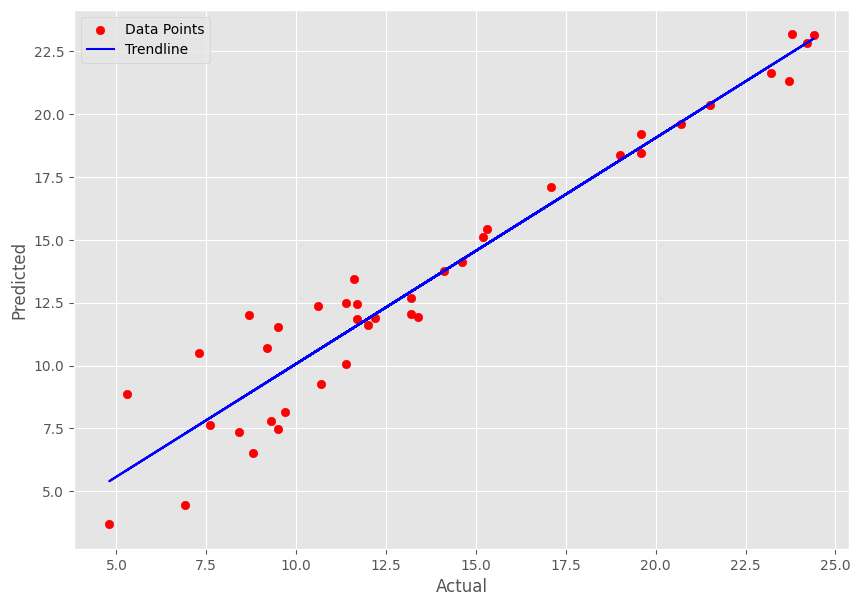

In [16]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(10, 7))
import numpy as np

x = final['Actual']
y = final['Predicted']

coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]

plt.scatter(x, y, label='Data Points', color='red')

plt.plot(x, slope * x + intercept, label='Trendline', color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [14]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

n = len(y_test)     ## no of samples
p = X_test.shape[1] ## no of predictors
adjusted_r2 = 1 - ( 1 - r2 )*( n - 1) / n - p - 1


print("The intercep is : ", mlr.intercept_)
print("mean_absolute_error is: ", mae)
print("mean_squared_error is : ", mse)
print("root_mean_squared_error is : ", rmse)
print("r square is  : ", r2)
print("adjusted r square is  : ", adjusted_r2) ## it decreases as  features/predictors increase

The intercep is :  2.903796964121284
mean_absolute_error is:  1.2640985208118813
mean_squared_error is :  2.3930472016135393
root_mean_squared_error is :  1.5469477048735485
r square is  :  0.9222411617255334
adjusted r square is  :  -3.0758148673176047
